In [36]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os.path
import rpy2
import scorecardpy as sc

In [2]:
f = os.path.expanduser("~/Documents/Vodacom/data/df_raw_final.pkl")

#reading from datafile
df = pd.read_pickle(f)

#datafile = df

In [3]:
#df.geometry

In [4]:
#df.D_LEARNERS_KM2.mean()
#df.D_MIGR_IN_KM2.max()
#testing statistical inferences on panda

In [5]:
dfclean = df.dropna(subset = ['target_label'])

#new data set after dropping all values with NaN

In [6]:
dfclean = dfclean.replace(to_replace = "yes", value = 1)
dfclean = dfclean.replace(to_replace = "no", value = 0)
dfclean = dfclean.replace(to_replace = "maybe", value = 2)

#replace all strings "yes", "no", "maybe" with integers 0, 1, 2

In [7]:
dfclean = dfclean[dfclean.target_label != 2]

#remove all rows with target_label = 2 ("maybe")

In [33]:
dfclean_nogeo = dfclean.drop(columns = "geometry")

#remove column geometry due to string error with conversion


dfclean_nogeo.vacant

202       0.000000
678       0.000000
986       0.000000
987       0.000000
989       0.000000
            ...   
103521    0.000000
103523    0.000000
103524    0.013333
103551    0.000000
103578    0.000000
Name: vacant, Length: 2129, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

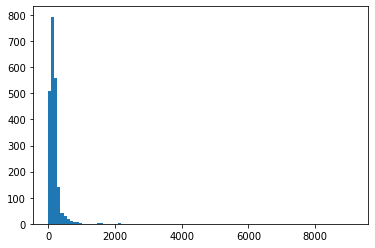

In [38]:
plt.hist(dfclean_nogeo.TOTAL_HH17,100)
plt.show

In [9]:
# feat_sum = pd.DataFrame()
# feat_sum = pd.DataFrame(dfclean_nogeo.dtypes)
# i = 1

# for feature in dfclean_nogeo:
#         feat_sum.loc[i-1:3] = dfclean_nogeo[feature].nunique()
#         feat_sum.loc[i-1:4] = dfclean_nogeo[feature].isna().sum()
        
#         i = i +1
        
# feat_sum

In [10]:
dfclean_nogeo.human_label.nunique()

3

In [11]:
# if (dfclean_nogeo['EA_CODE'].dtype == 'object'):
    
#     #dfclean_nogeo['EA_CODE'].astype('category')
    
# elif (dfclean_nogeo['EA_CODE'].dtype == 'float64' or dfclean_nogeo['EA_CODE'].dtype =='int64'):
    
#     my_list = dfclean_nogeo['EA_CODE'].values
#     new_list = []
#     for item in my_list:
#         new_list.append(len(str(item)))
    
#     len(set(new_list)) == 1 
#     #dfclean_nogeo['EA_CODE'].astype('category')

# else     dfclean_nogeo['EA_CODE'].astype('numerical')

In [105]:
Feat_typ = {}
Num_typ = {}
num_list = []
j = 1
for i, feature in enumerate(dfclean_nogeo):
    if (dfclean_nogeo[feature].dtype == 'float64' or dfclean_nogeo[feature].dtype == 'int64'):
        my_list = dfclean_nogeo[feature].values
        new_list = []
        for item in my_list:
            new_list.append(len(str(item)))
        CODE = (len(set(new_list)) == 1)
    if (dfclean_nogeo[feature].dtype == 'object' or CODE):
        Feat_typ[feature] = [i,"cat"]
    else:
        Feat_typ[feature] = [i, "num"]
        Num_typ[feature] = [j, "num"]
        num_list.append(feature)
        j = j + 1
    if feature == "target_label":
        num_list.append(feature)
        
Num_typ

{'TOTAL_HH17': [1, 'num'],
 'W_M_INC17': [2, 'num'],
 'P_NLI1': [3, 'num'],
 'P_NLI2': [4, 'num'],
 'P_NLI3': [5, 'num'],
 'P_NLI4': [6, 'num'],
 'P_NLI5': [7, 'num'],
 'P_NLI6': [8, 'num'],
 'P_NLI7': [9, 'num'],
 'P_NLI8': [10, 'num'],
 'P_NLI9': [11, 'num'],
 'P_NLI10': [12, 'num'],
 'HH_NLI1': [13, 'num'],
 'HH_NLI2': [14, 'num'],
 'HH_NLI3': [15, 'num'],
 'HH_NLI4': [16, 'num'],
 'HH_NLI5': [17, 'num'],
 'HH_NLI6': [18, 'num'],
 'HH_NLI7': [19, 'num'],
 'HH_NLI8': [20, 'num'],
 'HH_NLI9': [21, 'num'],
 'HH_NLI10': [22, 'num'],
 'NLI17V2': [23, 'num'],
 'AREA_KM2': [24, 'num'],
 'POP_KM2': [25, 'num'],
 'T_N_POP': [26, 'num'],
 'D_POP_CHAN': [27, 'num'],
 'AGE0_4': [28, 'num'],
 'AGE5_9': [29, 'num'],
 'AGE10_14': [30, 'num'],
 'AGE15_19': [31, 'num'],
 'AGE20_24': [32, 'num'],
 'AGE25_29': [33, 'num'],
 'AGE30_34': [34, 'num'],
 'AGE35_39': [35, 'num'],
 'AGE40_44': [36, 'num'],
 'AGE45_49': [37, 'num'],
 'AGE50_54': [38, 'num'],
 'AGE55_59': [39, 'num'],
 'AGE60_64': [40, 'num'],

In [106]:
#clean categorical data

num_list

['TOTAL_HH17',
 'W_M_INC17',
 'P_NLI1',
 'P_NLI2',
 'P_NLI3',
 'P_NLI4',
 'P_NLI5',
 'P_NLI6',
 'P_NLI7',
 'P_NLI8',
 'P_NLI9',
 'P_NLI10',
 'HH_NLI1',
 'HH_NLI2',
 'HH_NLI3',
 'HH_NLI4',
 'HH_NLI5',
 'HH_NLI6',
 'HH_NLI7',
 'HH_NLI8',
 'HH_NLI9',
 'HH_NLI10',
 'NLI17V2',
 'AREA_KM2',
 'POP_KM2',
 'T_N_POP',
 'D_POP_CHAN',
 'AGE0_4',
 'AGE5_9',
 'AGE10_14',
 'AGE15_19',
 'AGE20_24',
 'AGE25_29',
 'AGE30_34',
 'AGE35_39',
 'AGE40_44',
 'AGE45_49',
 'AGE50_54',
 'AGE55_59',
 'AGE60_64',
 'AGE65_69',
 'AGE70_74',
 'AGE75_79',
 'AGE80OVER',
 'population',
 'pd',
 'atoll_area',
 'no_income',
 'r_1___r_4800',
 'r_4801___r_9600',
 'r_9601___r_19_600',
 'r_19_601___r_38_200',
 'r_38_201___r_76_400',
 'r_76_401___r_153_800',
 'r_153_801___r_307_600',
 'r_307_601___r_614_400',
 'r_614_001___r_1_228_800',
 'r_1_228_801___r_2_457_600',
 'r_2_457_601_or_more',
 'internet_access_from_home',
 'internet_access_from_cell_phone',
 'internet_access_from_work',
 'internet_access_from_elsewhere',
 'interne

In [14]:
%load_ext rpy2.ipython

In [112]:
%%R -i dfclean_nogeo -i num_list -o cutsgood -o cutsbad

library(smbinning)

cutsgood = list()
cutsbad = list()
i = 1
j = 1
# sbin = smbinning(dfclean_nogeo, 'target_label', 'TOTAL_HH17')
# cuts = sbin['bands'] 
# is.na(cuts) 

for (col in num_list) {

    sbin = smbinning(dfclean_nogeo, 'target_label', col)

    if (!is.na(sbin['bands'])) {
        
        cutsgood[[i]] <- sbin$bands
        i = i + 1
        
    } else {
        
        cutsbad[[j]] = NA
        j = j + 1
    }

}
#cuts

In [93]:
# cuts = {
#     'internet_access_grand_total': np.array(cuts).tolist()}
# cuts

#making a dictionary out of cut values named cutp
# dict(cuts[i:i+2] 
#      for i in range(0, len(cuts), 2))

In [113]:
cutsg_dic = dict(zip(num_list, cutsgood))
# cutsg_dic

cutsb_dic = dict(zip(num_list, cutsbad))
# cutsb_dic

In [32]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#error 15 fix. Mac only.

In [116]:
bins = sc.woebin(dfclean_nogeo.loc[:, num_list], 
                         y = "target_label",breaklist = cutsg_dic, positive = 0)

# bins = sc.woebin(dfclean_nogeo.loc[:,[feature, "target_label"]], 
#                          y = "target_label", breaklist = cuts_dic, positive = 0)

[INFO] creating woe binning ...
Binning on 2129 rows and 92 columns in 00:00:19


In [109]:
for feature in dfclean_nogeo.loc[:,num_list]:   
   
    if cuts_dic[feature] == 'BoolVector':
        
        bins = sc.woebin(dfclean_nogeo.loc[:,[feature, "target_label"]], 
                         y = "target_label", positive = 0)
        
    else: bins = sc.woebin(dfclean_nogeo.loc[:,[feature, "target_label"]], 
                         y = "target_label", breaklist = cuts_dic, positive = 0)

#sc.woebin_plot(bins) 
print(bins)

[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] c

KeyError: 'target_label'

In [117]:
print(bins)

{'internet_access_from_cell_phone':                           variable                        bin  count  \
0  internet_access_from_cell_phone                    missing     18   
1  internet_access_from_cell_phone                 [-inf,0.1)    608   
2  internet_access_from_cell_phone                  [0.1,0.2)    901   
3  internet_access_from_cell_phone  [0.2,0.30000000000000004)    432   
4  internet_access_from_cell_phone  [0.30000000000000004,inf)    170   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.008455     4   14  0.777778  1.438357  0.015899  0.249022   
1     0.285580   245  363  0.597039  0.578739  0.095558  0.249022   
2     0.423203   587  314  0.348502 -0.440038  0.079065  0.249022   
3     0.202912   265  167  0.386574 -0.276142  0.015183  0.249022   
4     0.079850    62  108  0.635294  0.740591  0.043318  0.249022   

                breaks  is_special_values  
0              missing               True  
1                  0.1      

In [ ]:
dfclean_nogeo.loc[:,[feature, "target_label"]]